<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.946439,96.419267,29.313672,-0.007796,204.671582,204.671763,-0.000180
1,0.0,1.0,52.877797,57.418437,73.158261,0.009326,193.463821,193.447887,0.015934
2,0.0,2.0,78.695774,94.794992,89.750285,-0.036761,273.204291,273.229654,-0.025363
3,0.0,3.0,97.950207,66.658262,37.184841,-0.014780,211.778531,211.796566,-0.018035
4,0.0,4.0,48.428715,43.177917,91.803062,-0.015756,193.393939,193.403457,-0.009518
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.861261,78.250735,54.976328,-0.029010,193.059314,193.087093,-0.027778
29996,999.0,26.0,49.819157,78.583386,95.004411,0.001287,233.408241,233.414463,-0.006222
29997,999.0,27.0,40.976566,62.586927,91.887967,-0.011381,205.440079,205.463535,-0.023456
29998,999.0,28.0,32.589900,50.409721,47.889858,-0.018102,140.871378,140.896229,-0.024851


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.946439  96.419267  29.313672 -0.007796  204.671582   
      1.0    52.877797  57.418437  73.158261  0.009326  193.463821   
      2.0    78.695774  94.794992  89.750285 -0.036761  273.204291   
      3.0    97.950207  66.658262  37.184841 -0.014780  211.778531   
      4.0    48.428715  43.177917  91.803062 -0.015756  193.393939   
...                ...        ...        ...       ...         ...   
999.0 25.0   49.861261  78.250735  54.976328 -0.029010  193.059314   
      26.0   49.819157  78.583386  95.004411  0.001287  233.408241   
      27.0   40.976566  62.586927  91.887967 -0.011381  205.440079   
      28.0   32.589900  50.409721  47.889858 -0.018102  140.871378   
      29.0   20.172187  51.889163  25.233005  0.004829  107.299183   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.671763 -0.000180  
      1.0    193.447887  0.015934  
      2.0    273.229654 -0.025363  
      3.0    211.796566 -0.018035  
      4.0    193.403457 -0.009518  
...                 ...       ...  
999.0 25.0   193.087093 -0.027778  
      26.0   233.414463 -0.006222  
      27.0   205.463535 -0.023456  
      28.0   140.896229 -0.024851  
      29.0   107.298448  0.000735  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.946439  96.419267  29.313672 -0.007796  204.671582   
      1.0    52.877797  57.418437  73.158261  0.009326  193.463821   
      2.0    78.695774  94.794992  89.750285 -0.036761  273.204291   
      3.0    97.950207  66.658262  37.184841 -0.014780  211.778531   
      4.0    48.428715  43.177917  91.803062 -0.015756  193.393939   
...                ...        ...        ...       ...         ...   
999.0 25.0   49.861261  78.250735  54.976328 -0.029010  193.059314   
      26.0   49.819157  78.583386  95.004411  0.001287  233.408241   
      27.0   40.976566  62.586927  91.887967 -0.011381  205.440079   
      28.0   32.589900  50.409721  47.889858 -0.018102  140.871378   
      29.0   20.172187  51.889163  25.233005  0.004829  107.299183   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.671763 -0.000180  
      1.0    193.447887  0.015934  
      2.0    273.229654 -0.025363  
      3.0    211.796566 -0.018035  
      4.0    193.403457 -0.009518  
...                 ...       ...  
999.0 25.0   193.087093 -0.027778  
      26.0   233.414463 -0.006222  
      27.0   205.463535 -0.023456  
      28.0   140.896229 -0.024851  
      29.0   107.298448  0.000735  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.946439,96.419267,29.313672,-0.007796,204.671582,204.671763,-0.000180
1,0.0,1.0,52.877797,57.418437,73.158261,0.009326,193.463821,193.447887,0.015934
2,0.0,2.0,78.695774,94.794992,89.750285,-0.036761,273.204291,273.229654,-0.025363
3,0.0,3.0,97.950207,66.658262,37.184841,-0.014780,211.778531,211.796566,-0.018035
4,0.0,4.0,48.428715,43.177917,91.803062,-0.015756,193.393939,193.403457,-0.009518
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.861261,78.250735,54.976328,-0.029010,193.059314,193.087093,-0.027778
29996,999.0,26.0,49.819157,78.583386,95.004411,0.001287,233.408241,233.414463,-0.006222
29997,999.0,27.0,40.976566,62.586927,91.887967,-0.011381,205.440079,205.463535,-0.023456
29998,999.0,28.0,32.589900,50.409721,47.889858,-0.018102,140.871378,140.896229,-0.024851


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.946439  96.419267  29.313672 -0.007796  204.671582   
      1.0    52.877797  57.418437  73.158261  0.009326  193.463821   
      2.0    78.695774  94.794992  89.750285 -0.036761  273.204291   
      3.0    97.950207  66.658262  37.184841 -0.014780  211.778531   
      4.0    48.428715  43.177917  91.803062 -0.015756  193.393939   
...                ...        ...        ...       ...         ...   
999.0 25.0   49.861261  78.250735  54.976328 -0.029010  193.059314   
      26.0   49.819157  78.583386  95.004411  0.001287  233.408241   
      27.0   40.976566  62.586927  91.887967 -0.011381  205.440079   
      28.0   32.589900  50.409721  47.889858 -0.018102  140.871378   
      29.0   20.172187  51.889163  25.233005  0.004829  107.299183   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.671763 -0.000180  
      1.0    193.447887  0.015934  
      2.0    273.229654 -0.025363  
      3.0    211.796566 -0.018035  
      4.0    193.403457 -0.009518  
...                 ...       ...  
999.0 25.0   193.087093 -0.027778  
      26.0   233.414463 -0.006222  
      27.0   205.463535 -0.023456  
      28.0   140.896229 -0.024851  
      29.0   107.298448  0.000735  

[30000 rows x 7 columns]

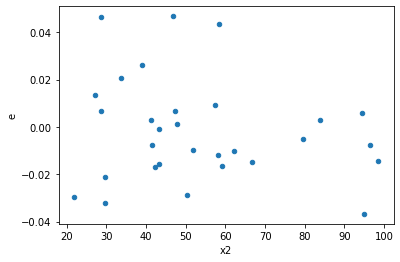

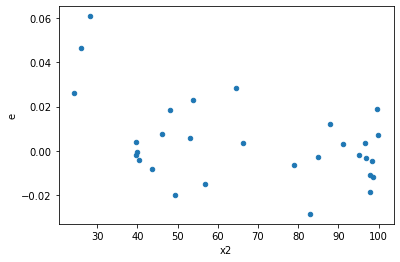

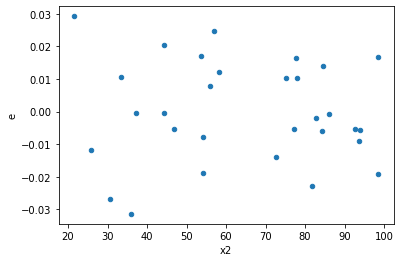

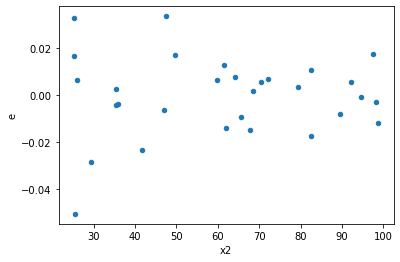

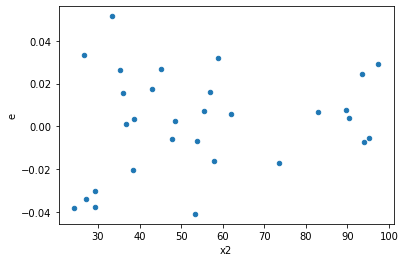

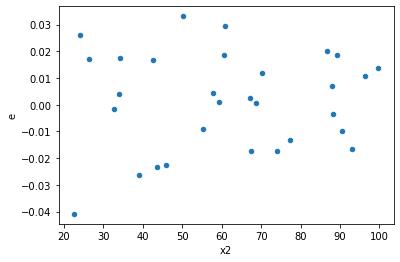

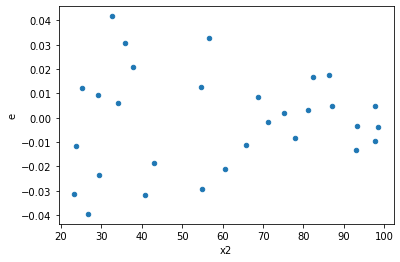

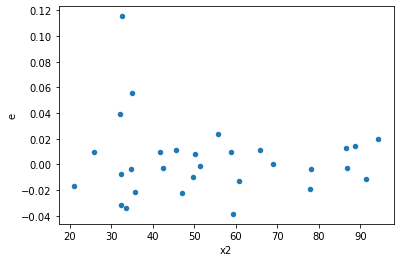

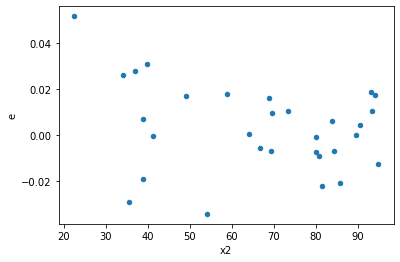

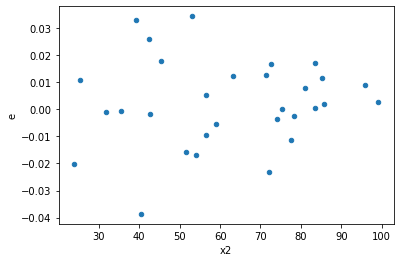

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,10.0,14.0,0.0018334891733604297,0.005625881048706211,0.00018334891733604296,0.00040184864633615794,2.1917154034765716,0.17471167043081048,0.9126441647845948,0.08735583521540524,Reject001=1 : Homoscedasticity
2.0,8.0,16.0,0.0009326653815448666,0.004353718826725444,0.00011658317269310833,0.00027210742667034023,2.3340197421683784,0.1418573401138361,0.929071329943082,0.07092867005691805,Reject001=1 : Homoscedasticity
4.0,18.0,6.0,0.008843095685351687,0.003961517972405272,0.0004912830936306493,0.0006602529954008786,1.3439359179277242,0.7567975308978983,0.6216012345510509,0.3783987654489491,Reject001=1 : Homoscedasticity
15.0,11.0,13.0,0.0035522152018915756,0.006311435662418168,0.00032292865471741597,0.00048549505095524367,1.50341273176914,0.47953936951680953,0.7602303152415952,0.23976968475840477,Reject001=1 : Homoscedasticity
16.0,19.0,5.0,0.003918680480897616,0.0011782641791625848,0.00020624634109987452,0.00023565283583251695,1.142579473535496,0.9677647833148519,0.516117608342574,0.48388239165742597,Reject001=1 : Homoscedasticity
18.0,13.0,11.0,0.008761332497315855,0.012382837833831812,0.0006739486536396812,0.0011257125303483465,1.6703238804156668,0.40067725454997927,0.7996613727250104,0.20033862727498963,Reject001=1 : Homoscedasticity
19.0,14.0,10.0,0.0022895125138937393,0.004091512479506032,0.0001635366081352671,0.00040915124795060326,2.5018939344283044,0.14967765442490322,0.9251611727875484,0.07483882721245161,Reject001=1 : Homoscedasticity
20.0,17.0,7.0,0.00396717310759753,0.005587850973072468,0.0002333631239763253,0.0007982644247246383,3.420696514182859,0.10445683926384342,0.9477715803680783,0.05222841963192171,Reject001=1 : Homoscedasticity
21.0,15.0,9.0,0.003891955821237003,0.009360103635046352,0.00025946372141580023,0.0010400115150051503,4.0083118723888695,0.04100841389833931,0.9794957930508303,0.020504206949169657,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,1.0,0.009455955491511554,4.4428646182047385e-27,0.0004111284996309371,4.4428646182047385e-27,1.0806510913724104e-23,1.1604871975700564e-249,Reject001=0 : Heteroscedasticity
1.0,10.0,14.0,0.0018334891733604297,0.005625881048706211,0.00018334891733604296,0.00040184864633615794,2.1917154034765716,0.17471167043081048,Reject001=1 : Homoscedasticity
2.0,8.0,16.0,0.0009326653815448666,0.004353718826725444,0.00011658317269310833,0.00027210742667034023,2.3340197421683784,0.1418573401138361,Reject001=1 : Homoscedasticity
3.0,19.0,5.0,0.006009595191604603,0.0007595321047157744,0.0003162944837686633,0.0001519064209431549,0.48026895421375326,0.22504759356176332,Reject001=1 : Homoscedasticity
4.0,18.0,6.0,0.008843095685351687,0.003961517972405272,0.0004912830936306493,0.0006602529954008786,1.3439359179277242,0.7567975308978983,Reject001=1 : Homoscedasticity
5.0,10.0,14.0,0.004201646711568886,0.004806751818578698,0.00042016467115688863,0.0003433394156127641,0.8171544139287281,0.7621632676734341,Reject001=1 : Homoscedasticity
6.0,16.0,8.0,0.006138851808508832,0.002737042296805431,0.000383678238031802,0.00034213028710067885,0.8917114738009213,0.8002134052276523,Reject001=1 : Homoscedasticity
7.0,10.0,14.0,0.011203889818738936,0.006792999902508117,0.0011203889818738935,0.0004852142787505798,0.4330766248156424,0.18754760593742664,Reject001=1 : Homoscedasticity
8.0,14.0,10.0,0.0040193967427191255,0.0020700066634244795,0.0002870997673370804,0.00020700066634244795,0.7210060400341981,0.5594397355154813,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      808
Reject001=0 : Heteroscedasticity    192
Name: Result_test, dtype: int64